---
# 생성형 AI에 대한 이해와 실무에서 활용 방법
---

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/ESTCampAI/Deeplearning

/content/drive/MyDrive/ESTCampAI/Deeplearning


In [3]:
!pip install -qU langchain langchain-core langchain-community langchain-openai
!pip install -qU huggingface_hub langchain_huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.3/84.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


# LangChain 개요

- 참고
  - https://www.samsungsds.com/kr/insights/what-is-langchain.html
  - https://velog.io/@26solitude/랭체인LangChain이란
  - https://wikidocs.net/book/14473
  - https://wikidocs.net/book/14314
  - 트러블슈팅 : https://wikidocs.net/232743  
- 2022년 10월 말 해리슨 체이스가 제작
- <font color=red>LLM과 애플리케이션의 통합</font>을 간소화하도록 설계된 강력한 프레임워크
- 간단하고 통합된 API를 활용하여 개발자들이 코드를 크게 변경하지 않고 <font color=red>모델을 쉽게 교체하거나 대체</font>할 수 있도록 함
- 검색 증강 생성(RAG) 어플리케이션 제작, 구조화된 데이터 분석, 챗봇 등을 제작 가능
- 주요 기능
  - <font color=red>문맥 인식</font>: 언어 모델과 다양한 문맥 소스(프롬프트 지시, 예제, 응답의 근거 내용 등)를 연동하며, 사용자의 문맥을 정확히 이해
  - <font color=red>추론 능력</font>: 제공된 문맥에 기반하여 어떤 대답을 할지, 또는 어떠한 액션을 취할지에 대한 추론이 가능



# 대규모 언어 모델(Large Language Model, LLM)의 문제점
- 일반적인 상황에서 프롬프트에 응답하는 데 탁월하지만, <font color=red>훈련한 적이 없는 특정 영역에서 성능이 떨어짐</font>
- 상태를 저장하지 않으므로 이전 <font color=red>대화 내용을 기억하지 못함</font> -> 데이터베이스의 필요
- 일률적인 규칙이 없으므로 감정 분석, 분류, 질문 답변과 요약 등 <font color=red>서로 다른 시나리오에 특화된 다양한 모델을 사용</font>해야 함
- 이를 위해서 기계 학습 엔지니어가 LLM을 조직의 내부 데이터 소스와 통합하고 프롬프트 엔지니어링을 적용해야 함
- LangChain은 이러한 데이터 응답 애플리케이션을 개발하기 위한 중간 단계를 간소화하여 프롬프트 엔지니어링의 효율성을 높임
  - LLM 기반 어플리케이션을 구축하기 위해서는 프롬프트를 보내고 응답을 기다리는 것 등의 작업이 필요 (매개변수 조정, 프롬프트 보강, 응답 조정 등)


#  랭체인을 구성하는 핵심 모듈

<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/langchain.png" width=40%>   
</center>  

- LLM의 가지는 다양한 문제점을 해결할 수 있는 방안을 제공

- ① <font color=red>데이터 소스</font>
  - 애플리케이션은 LLM에 대한 컨텍스트를 구축하기 위해 PDF, 웹 페이지, CSV, 관계형 데이터베이스와 같은 외부 소스에서 데이터를 검색해야 함
  - 랭체인은 서로 다른 소스에서 데이터에 액세스하고 검색할 수 있는 모듈과 원활하게 통합

- ② <font color=red>단어 임베딩</font>
  - 일부 외부 소스에서 검색한 데이터는 벡터로 변환해야 함
  - 선택한 LLM을 기반으로 최적의 임베딩 모델을 선택

- ③ <font color=red>벡터 데이터베이스</font>
  - 메모리 내 배열부터 파인콘(Pinecone)과 같은 호스팅 벡터 데이터베이스에 이르기까지 다양한 소스에서 벡터를 쉽게 저장하고 검색할 수 있도록 지원

- ④ <font color=red>언어 모델(LLM)</font>
  - 랭체인은 오픈AI, 코히어(Cohere), AI21에서 제공하는 주류 LLM과 허깅페이스(Hugging Face)에서 제공되는 오픈소스 LLM을 지원, 추가되는 LLM도 빠르게 업데이트
.

### LangChain 프레임워크 및 모듈의 작동 방식
<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/langchain2.png" width=60%>   
</center>

- <font color=red>에이전트</font>
  - 에이전트는 랭체인에서 아주 강력한 모듈로 LLM을 사용해 일련의 작업을 선택하는 것으로, 일종의 동적 체인
  - ReAct 프롬프트 기법을 단순화하여 추론과 행동을 가능하게 함
  - 언어 모델이 어떤 조치를 취할지 결정하고, 해당 조치를 실행하며, 관찰하고, 필요한 경우 반복하는 과정을 포함
    - 동작의 순서는 체인(코드)으로 하드코딩
    - 언어 모델은 에이전트 내에서 어떤 순서로 어떤 동작을 취할지 결정하는 추론 엔진으로 사용

- <font color=red>Memory</font>
  - LLM은 상태를 저장하지 않지만 정확한 응답을 위해서는 컨텍스트가 필요
  - 단기 및 장기 메모리를 쉽게 추가할 수 있도록 지원
    - 단기 메모리는 간단한 메커니즘을 통해 대화 기록을 저장하고 관리
    - 메시지 기록은 레디스(Redis) 같은 외부 소스에 저장돼 장기 메모리를
유지할 수 있음

- <font color=red>콜백</font>
  - 개발자에게 LLM 애플리케이션의 다양한 단계에 연결할 수 있는 콜백 시스템을 제공하며 로깅, 모니터링, 스트리밍 및 기타 작업에 유용

- <font color=red>데이터 연결</font>
  - RAG에 초점을 맞춰 생성 단계에서 필요한 데이터를 외부 데이터 소스에서 가져오는 작업을 담당
  - 외부 문서를 로드하고, 일괄적으로 단어 임베딩으로 변환한 다음, 임베딩을 벡터 데이터베이스에 저장하고, 마지막으로 쿼리를 통해 검색

- <font color=red>체인</font>
  - 구성 요소와 LLM을 활용하여 예상되는 응답을 얻는 효율적인 파이프라인을 구축하도록 설계
  - 예를 들어, 체인은 문서를 요약한 다음 이에 대한 감정 분석을 수행하는 프롬프트가 포함될 수 있음

- <font color=red>모델 I/O</font>
  - LLM과의 상호 작용을 처리
  - 프롬프트 관리, 최적화 및 LLM과의 일반적인 인터페이스와 작업을 위한 유틸리티를 포함




### LangChain의 동작

- 참고문헌 : "LLM 앱을 개발하는 빠르고 쉬운 방법" 개발자를 위한 랭체인 입문서, IDG Korea, 2024

- 에이전트 : 상위 지시문이 주어지면 체인이 사용할 툴을 선택할 수 있도록 함
- 콜백 : 체인의 중간 단계를 기록 및 스트리밍 등의 다양한 기능을 지원

- 모델 I/O : 언어 모델과의 인터페이스
  - 프롬프트를 관리하고 공통 인터페이스를 통해 언어 모델을 호출하고 모델 출력에서 정보를 추출

<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/langchain3.png" width=80%>   
</center>

- 데이터 연결 : 애플리케이션별 데이터와의 인터페이스
  - 데이터 로드, 변환, 저장 및 쿼리하기 위한 빌딩 블록을 제공

<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/langchain4.png" width=80%>   
</center>

- 메모리
  - 대화형 시스템에 필요한 어느 정도 기간의 과거 메시지에 직접 액세스 기능 지원
  - 체인 실행 간 애플리케이션 상태 유지

- 체인
  - 랭체인은 체인으로 연결된 애플리케이션을 위한 체인 인터페이스를 제공
  - LangChain에 다양한 AI 구성 요소를 유지하며 컨텍스트 인식 응답을 제공한다는 기본 원칙
  - 사용자의 쿼리부터 모델의 출력에 이르기까지 일련의 자동화된 작업

<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/langchain5.png" width=80%>   
</center>





- 체인의 예
  - 다른 데이터 소스에 연결
  - 고유한 콘텐츠 생성
  - 다언어 번역
  - 사용자 쿼리에 대답

- 링크
  - 체인은 링크로 구성
  - 개발자가 서로 연결하여 체인 시퀀스를 형성하는 각 작업
  - 링크를 사용하여 복잡한 작업을 여러 개의 작은 작업으로 분리

- 링크의 예
  - 사용자 입력 형식 지정
  - LLM에 쿼리 전송
  - 클라우드 스토리지에서 데이터 검색
  - 특정 언어에서 다른 언어로 번역

# LangChain 라이브러리
  - <font color=red>LangChain</font> 라이브러리 : 기본 런타임, 즉시 사용 가능한 체인과 에이전트의 구현을 포함
  - <font color=red>LangChain Template</font> : 다양한 작업을 위한 쉽게 배포할 수 있는 참조 아키텍처 모음
  - <font color=red>LangServe</font> : LangChain 체인을 REST API로 배포하기 위한 라이브러리
  - <font color=red>LangSmith</font> : 구축된 체인을 디버그, 테스트, 평가, 모니터링할 수 있게 해주며 LangChain과 원활하게 통합되는 개발자 플랫폼
    - 프로토타입에서 프로덕션으로 이전하기 위해 랭체인 언어 모델 애플리케이션 및 지능형 에이전트를 추적하고 평가하는 데 유용
  - <font color=red>LangGraph</font> : LLM을 사용한 상태유지가 가능한 다중 액터 애플리케이션을 구축하기 위한 라이브러리

# LangChain의 장점
- 언어 모델 용도 변경
  - 재훈련이나 미세 조정 없이 LLM을 분야별 애플리케이션에 맞게 재활용 가능
  - 개발팀은 독점 정보를 참조하여 모델 응답을 보강하는 복잡한 애플리케이션 구축 가능
  - RAG 워크플로를 만들 수 있으며 이를 통해 모델 할루시네이션을 줄이고 응답 정확도 향상
- AI 개발 간소화
  - LangChain은 복잡한 데이터 소스 통합과 프롬프트 세분화를 추상화하여 인공 지능(AI) 개발을 간소화
  - 개발자는 시퀀스를 사용자 지정하여 복잡한 애플리케이션 빠르게 구축 가능
- 개발자 지원
  - LangChain은 언어 모델을 외부 데이터 소스와 연결하는 도구를 AI 개발자에게 제공
  - LangChain은 오픈 소스이며 활발한 커뮤니티 지원을 받음

# API key 획득 및 설정



- OpenAI 로그인 및 결재 등록
  - https://platform.openai.com/docs/overview 에 접속
  - Sign Up을 클릭하여 로그인
  - 우측 상단의 Setting 버튼을 클릭
  - Billing 메뉴에서 Add pyayment details 버튼을 클릭하여 신용카드를 등록

  <center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/openai_reg01.png" width=60%>   
</center>

    - "Add to credit balance" 버튼을 눌러 사용할만큼의 미화(달러)를 입력
      - 금액은 $5 부터 추가가 가능 (최소금액)
    - 금액을 입력한 후 "Continue" 를 눌러 결제를 진행  
      - 왼쪽의 "Limits" 탭에서 월간 사용한도를 설정

  - 신용카드를 등록했다면 등록된 신용카드는 Payment methods 탭을 클릭하면 확인 가능






### OpenAI API 키 발급 및 테스트
- 우측 프로필 이미지 클릭 → `Your profile` 클릭
- `User API keys` 클릭 → `Create new secrete key` 버튼을 클릭
- 이름 입력
- API 키 복사
> ⚠️주의사항 : API 키는 한번만 제공됨, 복사하여 개인 메모장(또는 마크다운)에 저장해둘 것을 권장

<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/openai_key.png" width=40%>   
</center>

<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/openai_key02.png" width=40%>   
</center>

<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/openai_key03.png" width=40%>   
</center>

- API 키 등록

In [ ]:
api_key = ""

# 환경변수 등록
import os

# 추가 - 지정하고 대입
os.environ["OPENAI_API_KEY"] = api_key

# GPT?

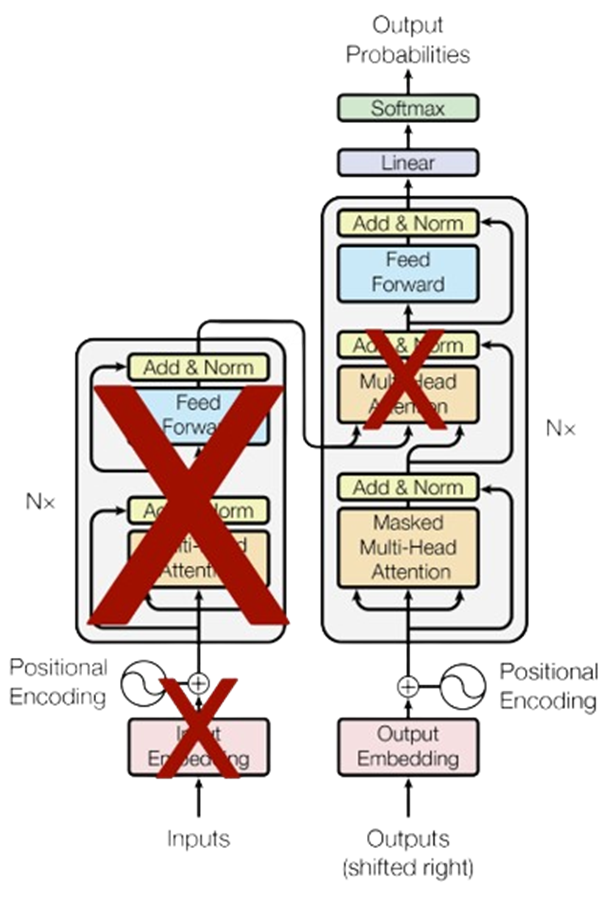

- GPT (Generative Pre-trained Transformer) : 대규모 텍스트 데이터를 학습한 후, 주어진 텍스트 입력에 대한 예측과 텍스트 생성을 수행하는 모델.

- 트랜스포머의 디코더 구조 사용 : GPT는 트랜스포머의 디코더 구조만을 사용함
  - 디코더는 새로운 문장을 생성하는 역할을 맡음
  - 디코더는 앞에 나온 단어들을 참고하여 다음 단어를 예측해 문장을 만들어냄

- 일방향 모델 : 문장을 왼쪽에서 오른쪽으로 한 방향으로만 이해함
  - 이는 단어를 순차적으로 생성하는 데에 강점을 줌
  - 예를 들어, GPT는 “I love reading”이라는 문장이 주어졌을 때, 다음에 나올 단어를 예측하는 데 매우 뛰어난 성능을 보임

- 문장 생성에 강점 : GPT는 주어진 문맥을 바탕으로 새로운 문장을 생성하는 데에 매우 능숙함
  - 대화형 AI, 자동 글쓰기, 스토리 생성 등 문장을 만들어내는 작업에서 강력한 성능을 보임

---

- 추가 보완 사항:
  - BERT는 양방향 특성으로 인해 문장을 더 잘 이해할 수 있지만, 생성 작업에는 적합하지 않다는 점
  - GPT는 일방향 모델로서 문장의 생성에는 뛰어나지만, 문장의 전체적인 의미를 이해하는 데는 BERT만큼 강하지 않다는 점


# GPT 모델 기본 구조
- Self-Attention Mechanism: 문장 내의 단어들이 서로 어떤 관계를 맺고 있는지를 파악하는 메커니즘.
- Position-wise Feed-Forward Networks: 각 단어의 위치 정보를 고려하여 처리를 진행.
- Multi-Head Attention: 다양한 관점에서 단어 간의 관계를 살펴보는 방법.

- GPT 버전별 특징

| GPT 버전    | 출시년도 | 주요 특징 및 개선점                                                                                                                                                                                                                                                                                                            | 모델 규모 (파라미터)                                        |
|-------------|----------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------|
| **GPT-1**   | 2018     | - Transformer 구조를 기반으로 최초의 GPT 모델<br>- 자연어 생성 및 이해의 가능성을 실험적으로 입증함                                                                                                                                                                                                                             | 약 **117M**                                               |
| **GPT-2**   | 2019     | - 모델 규모와 성능이 크게 향상됨<br>- 뛰어난 텍스트 생성 능력으로 주목받음<br>- 남용 위험 문제로 초기에는 전체 공개가 지연됨                                                                                                                                                                                                    | 약 **1.5B**                                               |
| **GPT-3**   | 2020     | - Few-shot 학습 등 다양한 작업 수행 능력 극대화<br>- 자연어 처리의 다재다능함을 입증<br>- 상업적 활용 및 연구에 폭넓게 응용됨                                                                                                                                                                                                 | 약 **175B**                                               |
| **GPT-3.5** | 2022     | - 대화형 응용(예: ChatGPT)과 코드 생성 성능 개선<br>- 사용자 피드백 반영 미세 조정(Fine-tuning)을 통해 성능 향상<br>- GPT-3 대비 더 자연스러운 대화와 응답 제공                                                                                                                                                              | 공식 수치는 공개되지 않았으나 GPT-3 대비 확장된 규모로 추정됨   |
| **GPT-4**   | 2023     | - 멀티모달 입력(텍스트, 이미지 등) 지원<br>- 향상된 추론 능력 및 정밀도, 안전성 강화<br>- 다양한 응용 분야에서의 활용성이 극대화됨                                                                                                                                                                                                | 공식 수치는 공개되지 않았으나 GPT-3보다 크게 확장된 규모로 추정됨 |
| **GPT-5**   | 2025 | - **미래 전망**: 더욱 정교한 언어 이해 및 생성, 멀티모달 입력의 확장, 안전성 및 효율성 강화<br>- 계산 최적화 및 더 효과적인 학습 기법 적용으로, 다양한 응용 분야에서 혁신적인 성능 제공 기대<br>- 연구 및 산업 전반에 걸쳐 **새로운 가능성** 제시 예상                                                            | 예상: **수천억 ~ 수조 단위** (추정치, 공식 발표 전까지는 불확실함)     |


### Huggingface 모델로 맛보기 (로컬로 활용해보기)

In [5]:
from langchain_huggingface.llms import HuggingFacePipeline

In [6]:
# 모델 초기화
hf_pipe = HuggingFacePipeline.from_model_id(
    model_id = "gpt2",
    task = "text-generation",
    pipeline_kwargs = {"max_new_tokens" : 200} # 답변토큰 최대 개수 제한
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Device set to use cpu


In [7]:
# 답변 출력(체인 실행) - invoke()
hf_pipe.invoke("빨간 사과는")
# gpt2 → gpt4나 5처럼 QnA 방식으로 학습된 게 아닌, 다음 토큰을 예측하는 형태로 학습이 되어있음

'빨간 사과는의 에라시리 계예정니다.\n\n\n저 있도 뛴다.\n\n저 있도 뛴다.\n\n저 있도 뛴다.\n\n이 실도 뛴다.\n\n저 있도 뛴다.\n\n저 있도 뛴다.\n\n이 실도 뛴다.\n\n이 실도 뛴다.\n\n이 실도 뛴다.\n\n저 있도 뛴다.\n\n저'

# 프롬프트 작성 원칙
- 모델이 최대한 정확하고 유용한 정보를 제공할 수 있도록 효과적인 프롬프트를 작성하는 것이 매우 중요

- 명확성과 구체성
  - 질문은 명확하고 구체적이어야 함 (모호한 질문은 LLM 모델의 혼란을 초래)
  - 예시:  "주식 시장은 ?" -> "다음 주 주식 시장에 영향을 줄 수 있는 예정된 이벤트들은 무엇일까?"

- 배경 정보 포함
  - 모델이 문맥을 이해할 수 있도록 필요한 배경 정보 제공 (환각 현상(hallucination) 감소 및 관련성 높은 응답 생성)
  - 예시: "2020년 미국 대선의 결과를 바탕으로 현재 정치 상황에 대한 분석을 해주세요"
  
- 간결함
  - 핵심 정보에 초점을 맞추고, 불필요한 정보는 배제 (복잡하면 덜 중요한 부분에 집중하거나 상당한 영향을 받는 문제 발생)
  - 예시: "2021년에 발표된 삼성전자의 ESG 보고서를 요약해주세요."

- 열린 질문 사용
  - 열린 질문을 통해 모델이 자세하고 풍부한 답변을 제공하도록 유도 (예/아니오로 답변하는 질문보다는 많은 답변을 요구하는 질문)
  - 예시: "신재생에너지에 대한 최신 연구 동향은 무엇인가요?"

- 명확한 목표 설정
  - 얻고자 하는 정보나 결과의 유형을 정확하게 정의 (명확한 지침에 따라 응답을 생성)
  - 예시: "AI 윤리에 대한 문제점과 해결 방안을 요약하여 설명해주세요."

- 언어와 문체
  - 대화의 맥락에 적합한 언어와 문체를 선택 (상황에 맞는 표현 선택)
  - 예시: 공식적인 보고서를 요청하는 경우, "XX 보고서에 대한 전문적인 요약을 부탁드립니다."와 같이 정중한 문체를 사용


# LangChain 모델 유형
- <font color=red>LLM</font>과 <font color=red>Chat Model</font> 클래스을 지원
- LLM은 주로 <font color=red>단일 요청에 대한 출력을 생성</font>하는 반면, Chat Model은 <font color=red>사용자와의 상호작용을 통한 연속적인 대화 관리</font>에 더 적합
- 공식 가이드에서는 LLM보다는 `Chat Model`을 권장

# Chat Model 클래스
- 기능: <font color=red>텍스트 문자열을 입력으로 받아 처리한 후, 텍스트 문자열을 반환</font>
- 광범위한 언어 이해 및 텍스트 생성 작업에 사용

> Chat Model 모델 가이드 : https://python.langchain.com/docs/integrations/llms/
> - 다양한 LLM 모델을 LangChaine에서 어떻게 다룰 수 있는지에 대한 각각의 가이드라인 명세

- Chat Model 클래스 사용해보기

In [8]:
from langchain_openai import ChatOpenAI # ChatModel 클래스 : LLM을 다룰 수 있는 도구

In [9]:
# 모델 초기화
llm = ChatOpenAI()

# 프롬프트 : 최종적으로 모델한테 입력되는 완성본 문구
# 프롬프트 작성
prompt = input("사용자 입력 >> ")

# 답변 출력
answer = llm.invoke(prompt) # 응답 객체를 반환(텍스트도 포함)

# 응답 객체 확인
display(answer)

사용자 입력 >> 빨간 사과


AIMessage(content='붉고 당과한 빨간색을 가진 사과는 맛이 달콤하고 상쾌하다. 식초와 함께 먹으면 더 맛있고 신선한 느낌을 준다. 혈관을 확장시켜 혈액순환을 도와주며 항산화 성분이 풍부하여 건강에 좋다. 영양가가 풍부하여 다이어트나 피로회복에 도움이 된다. 생과일이 아니라도 주스나 사과즙으로도 맛을 낼 수 있다.생리통을 치료하기에도 좋은 식품이다. 생농도에서도 불리한 상태인 경우, 잼 등의 과일 기반 제품으로 소화시키는 것이 좋다.입맛이 없더라도 사과가 좋은 영양가를 제공해줄 수 있다.생 으로 먹을 수 않더라도 주스나 케이크, 다른 디저트 요리에 활용할 수도 있다.생으로 먹는 것보다 살짝 익혔을 때가 더 맛있는 효가 있다. 한 과일씩 먹으면서 건강을 도모할 수 있다.생 보다 익힌 것이 소화에 더 좋다.생 과일로는 살짝 질겨 느껴질 수 있으나 요리를 활용하면 다양하게 맛 볼 수 있다.생고 향이 배 가득 풍긴 사과는 입맛에 활기를 불어넣는다..onload값이 덜 돼있어 포만감을 느끼기는 조금 어려워도 절약할 수 있어 좋다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 521, 'prompt_tokens': 13, 'total_tokens': 534, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CiUg7NWp40rKUf

In [10]:
# 답변 확인
answer.content

'붉고 당과한 빨간색을 가진 사과는 맛이 달콤하고 상쾌하다. 식초와 함께 먹으면 더 맛있고 신선한 느낌을 준다. 혈관을 확장시켜 혈액순환을 도와주며 항산화 성분이 풍부하여 건강에 좋다. 영양가가 풍부하여 다이어트나 피로회복에 도움이 된다. 생과일이 아니라도 주스나 사과즙으로도 맛을 낼 수 있다.생리통을 치료하기에도 좋은 식품이다. 생농도에서도 불리한 상태인 경우, 잼 등의 과일 기반 제품으로 소화시키는 것이 좋다.입맛이 없더라도 사과가 좋은 영양가를 제공해줄 수 있다.생 으로 먹을 수 않더라도 주스나 케이크, 다른 디저트 요리에 활용할 수도 있다.생으로 먹는 것보다 살짝 익혔을 때가 더 맛있는 효가 있다. 한 과일씩 먹으면서 건강을 도모할 수 있다.생 보다 익힌 것이 소화에 더 좋다.생 과일로는 살짝 질겨 느껴질 수 있으나 요리를 활용하면 다양하게 맛 볼 수 있다.생고 향이 배 가득 풍긴 사과는 입맛에 활기를 불어넣는다..onload값이 덜 돼있어 포만감을 느끼기는 조금 어려워도 절약할 수 있어 좋다.'

## (선택) 타 LLM 연동하기
  - 각 API key를 받아야 실행 가능

```python
from langchain_anthropic import ChatAnthropic
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.chat_models import init_chat_model
```
---

- Claude (Anthropic) 연동하기
  - https://console.anthropic.com/settings/keys

```python
# 결재 필요
with open("../key/.anthropic_api_key", "r") as f:
    api_key = f.read().strip()

os.environ['ANTHROPIC_API_KEY'] = api_key
llm = ChatAnthropic(model="claude-3-haiku-20240307",
    temperature=0,
    max_tokens=200
)

prompt = input("[사용자] : ")

answer = llm.invoke(prompt)

print("[챗봇] : ", answer.content)
```


- Google AI chat models (gemini-2.5-flash) 연동하기
- 프로젝트 생성 : https://console.cloud.google.com/
- API key : https://aistudio.google.com/app/apikey?hl=ko

```python
# 파일에서 API 키 읽기
with open("../key/.google_api_key", "r") as f:
    api_key = f.read().strip()

os.environ['GOOGLE_API_KEY'] = api_key
# ChatGoogleGenerativeAI 언어 모델 초기화
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

prompt = input("[사용자] : ")

answer = llm.invoke(prompt)

print("[챗봇] : ", answer.content)
```

# 프롬프트 탬플릿 (PromptTemplate) 구성 요소
- PromptTemplate : 단일 문장 또는 입력변수 등의 <font color=red>간단한 명령을 입력</font>하여 단일 문장 또는 <font color=red>간단한 응답을 생성</font>하는 데 사용되는 프롬프트를 구성할 수 있는 문자열 템플릿
  - <font color=red>지시</font> : 언어 모델에게 어떤 작업을 수행하도록 요청하는 구체적인 지시
  - <font color=red>예시</font> : 요청된 작업을 수행하는 방법에 대한 하나 이상의 예시
  - <font color=red>맥락</font> : 특정 작업을 수행하기 위한 추가적인 맥락
  - <font color=red>질문</font> : 어떤 답변을 요구하는 구체적인 질문

- 예시: 제품 리뷰 요약
  - 지시: "아래 제공된 제품 리뷰를 요약해주세요."
  - 예시: "예를 들어, '이 제품은 매우 사용하기 편리하며 배터리 수명이 길다'라는 리뷰는 '사용 편리성과 긴 배터리 수명이 특징'으로 요약할 수 있습니다."
  - 맥락: "리뷰는 스마트워치에 대한 것이며, 사용자 경험에 초점을 맞추고 있습니다."
  - 질문: "이 리뷰를 바탕으로 스마트워치의 주요 장점을 두세 문장으로 요약해주세요."


- 프롬프트 템플릿의 활용
  - 파라미터
    - <font color=red>template</font>: 문자열 템플릿 및 변수 설정 (중괄호 {} 사용)
    - <font color=red>input_variables</font> : PromptTemplate에서 사용되는 변수(중괄호 안에 들어갈 변수)의 이름을 정의하는 리스트

 - <font color=red>from_template()</font> : 문자열 템플릿을 직접 설정하는 함수

In [11]:
from langchain_core.prompts import PromptTemplate

In [12]:
# 모델 초기화
llm = ChatOpenAI(
    model_name = "gpt-4.1",
    temperature = 0, # 창의성을 조절하는 값, 0 ~ 2, 0에 가까울수록 같은 입력이 들어갈 때 거의 같은 출력
    max_tokens = 500 # 최대 토큰 제한
)

In [13]:
# 질문 정의 - 사용자에게는 키워드만 입력받고, 프롬프트를 완성시킬 수 있는 템플릿 만들어보기
template = "{country}의 수도는 어디야?"

In [14]:
# 사용법 2가지

# 1번
prompt1 = PromptTemplate(template = template, input_variables = ["country"])

# 2번
prompt2 = PromptTemplate.from_template(template)

> 프롬프트와 모델의 체인 연결 없이 실행하는 경우,
> - format() : 미리 탬플릿의 값을 채워서 프롬프트를 완성하는 함수

In [15]:
fill_prompt = prompt2.format(country = "몽골")
fill_prompt

'몽골의 수도는 어디야?'

In [16]:
# llm에게 전달
llm.invoke(fill_prompt).content

'몽골의 수도는 울란바토르(Улаанбаатар, Ulaanbaatar)입니다.'

# LangChain Expression Language (LCEL)
- https://blog.langchain.dev/langchain-expression-language/
- <font color=red>체인을 구성하고 스트리밍, 배치 및 비동기 지원</font>을 기본적으로 제공하는 선언적 방법
- 기본적으로 파이썬 또는 타입스크립트/자바스크립트를 사용한 체인 만들기의 고수준 대안으로 코드를 사용해 구성할 때 사용하는 모든 기존 랭체인 생성자를 그대로 사용해 체인을 만들 수 있음

# | (파이프라인)으로 체인 생성하기 (LCEL)
  - LangChain 0.1.17 이후 버전부터 사용
  - <font color=red>|</font> 기호는 unix 파이프 연산자와 유사하며, <font color=red>서로 다른 구성 요소를 연결하고 한 구성 요소의 출력을 다음 구성 요소의 입력으로 전달</font>

  - prompt | llm | OutputParser와 같이 체인이 연결된 경우
<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/lcel1.png" width=60%>   
</center>

- 표준 인터페이스 함수을 이용하여 딕셔너리 형태로 값들을 전달
   - <font color=red>invoke()</font> : 딕셔너리 입력에 대해 체인을 호출
   - <font color=red>batch()</font> : 입력 목록에 대해 체인을 호출
   - <font color=red>stream()</font> : 응답의 청크를 스트리밍

In [17]:
# LCEL 기반으로 체인 구성
chain = prompt2 | llm

# 체인 실행
chain.invoke({"country" : "몽골"}).content

'몽골의 수도는 울란바토르(Улаанбаатар, Ulaanbaatar)입니다.'

# Chat Model 클래스
- 기능: 메시지의 리스트를 입력으로 받고, 하나의 메시지를 반환
- <font color=red>대화형 메시지를 입력으로 사용하고 대화형 메시지를 출력</font>으로 반환하는 특수화된 LLM 모델
- 일반 텍스트를 사용하는 대신 <font color=red>대화의 맥락을 포함한 메시지를 처리</font>하며, 이를 통해 보다 더 <font color=red>자연스러운 대화를 가능</font>하게 함
- (예시) 사용자가 챗봇과 대화하는 상황에서, 사용자의 질문과 이전 대화 내용을 고려하여 적절한 답변을 생성

- Chat Model 인터페이스의 특징
  - 대화형 입력과 출력
    - 대화의 연속성을 고려하여 입력된 메시지 리스트를 기반으로 적절한 응답 메시지를 생성
    - 챗봇, 가상 비서, 고객 지원 시스템 등 대화 기반 서비스에 활용

  - 다양한 모델 제공 업체와의 통합
    - OpenAI, Cohere, Hugging Face 등 다양한 모델 제공 업체와의 통합을 지원
    - 개발자는 여러 소스의 Chat Models를 조합하여 활용

  - 다양한 작동 모드 지원
    - 랭체인은 동기(sync), 비동기(async), 배치(batching), 스트리밍(streaming) 모드에서 모델을 사용할 수 있는 기능을 제공
    - 다양한 애플리케이션 요구사항과 트래픽 패턴에 따라 유연한 대응이 가능

# GPT3.5, GPT4o, GPT5.1 비교
- OpenAI Models 가이드 : https://platform.openai.com/docs/models
- gpt5는 대답할 수 없는 경우 빈 토큰으로 응답을 진행

In [18]:
# langchain 0.2.x ver 이었을 때 사용했던 방법
# ChatOpenAI 클래스는 OpenAI사에서 제공하는 모델만 사용 가능 (제미나이, 클로드 X)
# llm1 = ChatOpenAI(model_name = "gpt-3.25-turbo", temperature = 0, max_tokens = 500)

In [19]:
# langchain 1.x.x ver 에서 새롭게 만들어진 모델 초기화 함수
from langchain.chat_models import init_chat_model

In [20]:
# 모델 이름 앞에 prefix 달아주면 됨
llm1 = init_chat_model(model = "openai:gpt-3.5-turbo", temperature = 0, max_tokens = 500)
llm2 = init_chat_model(model = "openai:gpt-4o", temperature = 0, max_tokens = 500)
llm3 = init_chat_model(model = "openai:gpt-5.1", temperature = 0, max_tokens = 500)

In [21]:
# 템플릿 객체 생성
prompt = PromptTemplate.from_template("{country}의 수도는 어디야?")

In [22]:
# 체인 구성
chain1 = prompt | llm1
chain2 = prompt | llm2
chain3 = prompt | llm3

In [23]:
# 응답속도 & 성능 비교
import time

start = time.time()
print(chain1.invoke({"country" : "안드로메다"}).content)
end = time.time()
print(f"gpt3.5 응답하는데 걸린 시간 : {end - start:.2f}")
print("-" * 100)

start = time.time()
print(chain2.invoke({"country" : "안드로메다"}).content)
end = time.time()
print(f"gpt4o 응답하는데 걸린 시간 : {end - start:.2f}")
print("-" * 100)

start = time.time()
print(chain3.invoke({"country" : "안드로메다"}).content)
end = time.time()
print(f"gpt5.1 응답하는데 걸린 시간 : {end - start:.2f}")
print("-" * 100)

안드로메다 은하계는 별도의 수도가 없습니다. 안드로메다 은하는 수많은 별과 행성으로 이루어진 은하이며, 우리 은하와 비슷한 구조를 가지고 있습니다. 따라서 안드로메다 은하에는 특정한 수도가 없습니다.
gpt3.5 응답하는데 걸린 시간 : 1.05
----------------------------------------------------------------------------------------------------
안드로메다는 우리 은하인 은하수와는 다른 은하로, 행정적인 수도나 도시가 존재하지 않습니다. 안드로메다는 과학자들이 연구하는 천문학적 대상이며, 인간이 거주하거나 관리하는 지역이 아닙니다.
gpt4o 응답하는데 걸린 시간 : 1.70
----------------------------------------------------------------------------------------------------
안드로메다는 실제로 존재하는 은하(Andromeda Galaxy) 이름이라, 지구의 나라들처럼 “수도”가 있지 않습니다.

- 안드로메다 = 우리 은하 근처에 있는 거대한 은하 이름  
- 국가나 행성이 아니라, 수천억 개의 별·행성·성단이 모인 하나의 은하  
→ 따라서 공식적인 수도 같은 개념은 없습니다.

소설, 영화, 게임 등에서는 창작 설정으로 “안드로메다 제국의 수도” 같은 게 등장할 수 있지만, 그건 작품마다 전부 다릅니다.
gpt5.1 응답하는데 걸린 시간 : 3.52
----------------------------------------------------------------------------------------------------


# (참고용) 프롬프트 프레임워크
### 후가츠식 프롬프트
- 참고 : https://brunch.co.kr/@pletalk/158
- 일본 Note사의 CXO 후가츠 타카유키가 개발한 ChatGPT용 프롬프트 작성을 위한 프레임워크
- ChatGPT를 효율적이고 올바르게 활용할 수 있도록 만들어진 작성 방식

- 형식
  - 지침(명령서), 제약조건, 입력문, 출력문으로 구분
  - 지침과 제약조건 : 입력문을 어떻게 처리할 것인지에 대한 내용을 구체적으로 나열
  - 출력문 : ChatGPT의 답변을 출력
  

<pre>
# 지침:
당신은 {역할}입니다.
아래의 제약조건과 입력문을 기반으로, 최상의 결과를 출력하세요.

# 제약조건:
- 문자수는 {문자수}입니다.
- {제약조건들에 관한 텍스트}

# 입력문:
{입력문 텍스트}

# 출력문:
</pre>
- 작성 규칙
  - 입력으로부터 어떤 출력을 만들지 명확히 지침에서 설명
  - 무엇을 출력할지 명확하게 제약조건을 명시
  - 마크업 언어를 사용하여 본문이 아닌 부분을 구분
  - 지침과 제약조건의 내용을 글머리 기호를 사용하여 명확하게 나누어 정리
  - 다양한 표현으로 출력할 수 있는 답변의 범위를 적극적으로 좁게 설명

---

- ticktok 기반 숏폼 비디오 콘텐츠 기획서 작성을 위한 예시

<pre>
#지침:
당신은 tiktok 영상을 전문으로하는 크리에이터이자 기획자입니다.
아래의 제약조건과 입력문을 기반으로, 최상의 콘텐츠 기획서를 만들어 주세요.

#제약조건:
- 세로형 풀스크린에 적합한 영상이어야 합니다.
- 영상에 어울리는 리듬, 스타일, 분위기가 표현될 수 있는 음악을 추천합니다.
- 영상에 담겨질 메시지는 짧고 명확해야 합니다.
- 적은 비용으로 영상제작이 가능하도록 구성합니다.
- 인기있는 트렌드를 반영해 주세요.
- 영상 플레이 시간은 1분입니다.
- 3초 안에 이목을 끌 수 있도록 만들어 주세요.
- 바이럴이 될 수 있는 요소들을 반영해 주세요.

#입력문:
환경 친화적인 지역에서 생산된 농산물을 활용하여 새로운 단백질 음료를 출시합니다.
가치 소비세대인 mz과 건강과 관심이 많은 직장인들을 목표 고객으로 합니다.

#출력문:
</pre>

### AIDA 프레임워크
  - 광고·콘텐츠 기획에서 가장 널리 쓰이는 고전적인 구조
  - 구조
    - Attention (주의 끌기)
    - Interest (흥미 유발)
    - Desire (욕구 자극)
    - Action (행동 유도)
  - 예: "3초 안에 이목을 끌고, 흥미로운 정보로 유입 유지 → 건강 욕구 자극 → 클릭/공유 유도"

<pre>
환경 친화적인 지역 농산물로 만든 단백질 음료를 홍보하기 위한 TikTok 영상 콘텐츠를 AIDA 구조로 기획해줘.
1초 이내에 시선을 끌 수 있는 장면으로 시작하고,
제품에 대한 흥미를 유발한 뒤,
건강을 원하는 MZ 세대의 욕구를 자극하고,
마지막에 클릭 유도 메시지를 포함해줘.
</pre>

### COSTAR 프레임워크
  - 명확한 컨텍스트와 목표 기반의 프롬프트 설계로 AI 응답 품질을 높이는 구조화된 방법론
  - 구조
    - Context(문맥)
    - Objective(목표)
    - Style(스타일)
    - Tone(톤)
    - Audience(대상)
    - Response(응답 형식)

<pre>
COSTAR 프레임워크에 따라 TikTok 콘텐츠 기획서를 작성해줘.

- C: 건강을 챙기기 어려운 직장인들의 현실을 설명해줘.
- O: 영상의 목표는 제품 인지도 상승과 MZ세대 타깃의 자발적 확산이야.
- S: 이 단백질 음료가 어떤 방식으로 이들의 문제를 해결하는지 제시해줘.
- T: 타깃은 20~34세의 가치소비를 중시하는 직장인들이야.
- A: 영상 구성은 HOOK(0~3초) - CORE(제품 설명) - CTA(행동 유도)로 구성하고, 음악/자막도 추천해줘.
- R: 영상이 도달할 기대성과, 전환/공유 측면에서의 기대효과를 정리해줘.
</pre>

### Chain of Thought (CoT)
- 복잡한 문제를 단계적으로 사고하게 만드는 프롬프트 설계 기법
- GPT 같은 언어 모델이 단순히 답을 “예/아니오”나 숫자로 내는 것이 아니라, 논리적 추론 과정을 거쳐 생각의 흐름을 따라가도록 유도하는 것이 핵심

- 구조

<pre>
[문제 또는 질문]
[Chain of Thought 유도 문장 → Step-by-step reasoning]
[최종 답변 또는 결론]
</pre>

- 작성 팁
  - 사고 흐름을 유도하는 가장 일반적인 표현
  - 논리를 말하게 유도
  - 문제를 세부적으로 나누어 생각하게 함
  - 마치 대화를 하듯 생각 흐름을 자연스럽게 표현
  - 사고의 첫 단계부터 유도

---

- CoT 구조의 프롬프트 템플릿

<pre>
아래의 단계적 질문 흐름을 따라 논리적으로 사고해줘:

Step 1: 문제 정의 → 사용자나 시장이 겪고 있는 문제를 설명해줘.  
Step 2: 제품 연결 → 해당 제품/서비스가 어떤 해결책을 제공하는지 설명해줘.  
Step 3: 공감 요소 → 타깃이 공감할 만한 포인트 3가지 도출해줘.  
Step 4: 콘텐츠 구상 → 영상이나 콘텐츠로 풀어낼 구체적 구성안을 HOOK, 본문, CTA로 나눠줘.  
Step 5: 바이럴 요소 → 콘텐츠가 퍼질 수 있는 대사, 편집, 음악 아이디어를 제안해줘.  
Step 6: 기대 효과 → 사용자 반응 및 마케팅 효과를 정리해줘.
</pre>
- 마케팅/콘텐츠 기획 프롬프트 예시

<pre>
아래의 단계별 질문 흐름을 따라, TikTok 숏폼 영상 기획을 논리적으로 구성해줘.
각 단계마다 간단한 설명과 함께 아이디어를 제시해.

Step 1: 문제 정의
→ MZ세대 직장인이 왜 단백질 보충이 필요하고, 기존 방식에 어떤 불편을 겪고 있는지 분석해줘.

Step 2: 제품 연결
→ 위 문제에 대해 단백질 음료가 어떤 해결책을 제시할 수 있는지 설명해줘.
특히 ‘환경 친화적’이라는 속성이 어떤 가치를 더하는지도 포함해줘.

Step 3: 타깃 공감 포인트 도출
→ 이 제품을 통해 타깃이 공감할 수 있는 포인트 3가지를 도출해줘.
(예: 간편함, 건강, 윤리적 소비 등)

Step 4: 콘텐츠 콘셉트 기획
→ 위에서 도출된 포인트를 바탕으로 1분 TikTok 영상의 콘셉트를 설명해줘.
HOOK (3초), 본문, CTA 구조로 구성하고, 구체적인 장면 예시도 포함해줘.

Step 5: 바이럴 요소 강화
→ 이 영상이 공유되거나 퍼질 수 있도록, 대사·편집·음악 등에서 반영할 수 있는 바이럴 요소를 2~3가지 제안해줘.

Step 6: 기대 효과 예측
→ 이 콘텐츠를 통해 기대할 수 있는 사용자 반응이나 브랜딩 효과를 논리적으로 정리해줘.
</pre>

### PAS 프레임워크
  - 문제를 중심으로 메시지를 설계
  - 구조
    - Problem (문제 제시)
    - Agitate (문제 확대, 공감 유도)
    - Solution (해결책 제시)
    - 예: “단백질 섭취 어려움 → 바쁜 직장인의 고충 강조 → 환경친화 단백질 음료 제안”


<pre>
건강을 챙기고 싶지만 바쁜 일상으로 식사를 제대로 못 챙기는 직장인들을 겨냥해,
그들의 문제(PAS 구조)를 중심으로 단백질 음료를 홍보하는 TikTok 콘텐츠를 기획해줘.
문제를 제시하고, 감정적으로 공감대를 형성한 뒤,
해결책으로 우리 제품을 제안해줘.
</pre>

### 4P 프레임워크
  - 제품 중심 숏폼 콘텐츠나 바이럴 콘텐츠에 적합
  - 구조
    - Picture (시각적 장면 그리기)
    - Promise (혜택 또는 변화 예고)
    - Proof (제품/사례/기능 제시)
    - Push (행동 촉구 또는 호기심 자극)

<pre>
TikTok에서 바이럴될 수 있도록 4P 구조로 단백질 음료 광고 영상을 기획해줘.

- MZ세대 직장인이 공감할 수 있는 장면을 시각적으로 보여주고 (Picture)
- 이 제품을 마시면 어떤 변화가 있는지 약속해주고 (Promise)
- 제품 원료나 후기 등을 근거로 제시하고 (Proof)
- 마지막에 행동 유도를 넣어줘 (Push)
</pre>

### FAB 프레임워크
  - 제품의 특장점을 구조적으로 설명할 때 유용
  - 구조
    - Feature (특징)
    - Advantage (장점)
    - Benefit (이용자 입장에서의 이익)

<pre>
FAB 프레임워크를 사용해서 단백질 음료의 TikTok 광고 기획안을 작성해줘.
제품의 주요 특징(국내산 농산물 사용, 무첨가 등),
장점(흡수 빠름, 맛있음),
고객에게 줄 수 있는 이득(간편한 건강관리)을 각각 짧고 강렬하게 구성해줘.
</pre>

### HOOK → CORE → CTA 구조 (숏폼 특화)
  - 틱톡, 릴스, 쇼츠에서 자주 쓰이는 구성
  - 구조
    - HOOK (0~3초): 시선을 잡아끄는 장면/질문/비주얼
    - CORE (3~45초): 제품/브랜드의 핵심 메시지
    - CTA (마무리): 클릭 유도, 공유, 브랜드 인식 강화 등

<pre>
TikTok에서 3초 안에 이목을 끌 수 있도록 HOOK → CORE → CTA 구조로 1분 영상 콘텐츠를 기획해줘.

- 초반에는 눈에 띄는 텍스트나 연출(HOOK)
- 중반에는 제품의 기능과 특징(CORE)
- 마지막에는 클릭 유도나 해시태그(CTA)를 넣어줘.
</pre>

### HWC 프레임워크 (후가츠 유사)
  - 사람 중심 스토리텔링에 적합
  - 구조
    - H (Who): 누구의 이야기인가
    - W (Why): 왜 이 이야기가 중요한가
    - C (Context): 어떤 배경과 맥락인가

<pre>
HWC 구조로 단백질 음료 광고 TikTok 영상을 기획해줘.
- 누가 이 음료를 마시는지 (Who)
- 왜 이 제품을 선택했는지 (Why)
- 어떤 상황에서 등장하면 공감될지 (Context)를 설정해서
스토리 기반의 영상 흐름으로 기획해줘.    
</pre>

### S.U.C.C.E.S 프레임워크
  - Chip & Dan Heath의 『Made to Stick』에서 소개
  - 기억에 남는 메시지 구성법
  - 구조
    - Simple (간결성)
    - Unexpected (예상 밖 요소)
    - Concrete (구체성)
    - Credible (신뢰성)
    - Emotional (감성 자극)
    - Stories (스토리 활용)

<pre>
SUCCES 원칙에 따라 기억에 남을 수 있는 TikTok 영상 기획을 작성해줘.

- 메시지는 단순하고(S)
- 예상치 못한 장면으로 주목을 끌고(U)
- 구체적인 예시나 시각 요소를 활용하고(C)
- 신뢰를 줄 수 있는 정보나 인증을 넣고(C)
- 감정을 자극하는 요소와(E)
- 공감 가능한 짧은 이야기를 담아줘(S).
</pre>

# ChatPromptTemplate
- <font color=red>대화형 상황에서 여러 메시지 입력을 기반으로 단일 메시지 응답을 생성</font>하는 데 사용
- 대화형 모델이나 챗봇 개발에 주로 사용
- 입력은 여러 메시지를 원소로 갖는 리스트로 구성되며, 각 메시지는 <font color=red>역할(role)</font>과 <font color=red>내용(content)</font>으로 구성

- Message 유형
  - <font color=red>SystemMessage</font>: 시스템 기능을 설명
  - <font color=red>HumanMessage</font>: 사용자 질문을 입력
  - <font color=red>AIMessage</font>: AI 모델의 응답을 제공
  - <font color=red>FunctionMessage</font>: 특정 함수 호출의 결과를 표시
  - <font color=red>ToolMessage</font>: 도구 호출의 결과를 표시

### <font color=red>from_messages()</font> 사용해보기

- 튜플 형태로 구성된 메시지 리스트를 입력 받아서, 각 메시지의 <b>역할(role)</b>과 <b>내용(content)</b>을 기반으로 대화형 프롬프트를 구성하는 함수

- **동작 예제 :**  
  1. **입력**: 예를 들어,  
     ```python
     messages = [
         ("system", "이 대화는 전문적이고 정중하게 진행됩니다."),
         ("user", "최근 데이터 분석 결과에 대해 설명해 주세요.")
     ]
     ```
     여기서 각 튜플은 첫 번째 원소에 역할(예: "system", "user")을, 두 번째 원소에 메시지 내용을 담음
  2. **처리**: `from_message()` 함수는 이 튜플 리스트를 받아 각 메시지의 역할과 내용을 확인한 후, 이를 대화의 맥락을 반영한 메시지 리스트(대화형 프롬프트)로 변환함
  3. **결과**: 최종적으로, ChatPromptTemplate에 맞는 메시지 리스트가 생성되어, 대화형 모델에게 전달할 준비가 완료됨

In [24]:
from langchain_core.prompts import ChatPromptTemplate

In [25]:
# 모델 초기화
init_chat_model(model = "openai:gpt-4.1", temperature = 0, max_tokens = 500)

# 1. 메세지 리스트 정의
messages = [
    ("system", "이 시스템은 여행전문가입니다."), # system : 역할이나 톤을 설정
    ("user", "{input}")                      # user / human : 사용자 입력값
]

# 2. 메세지 템플릿 객체 생성
prompt = ChatPromptTemplate.from_messages(messages)

# 3. 체인 구성
chain = prompt | llm

# 4. 체인 실행
user_input = input("사용자 입력 >> ")
# chain.invoke({"input" : user_input}) # 기존 사용법
# langchain 1.x.x 지원 → 입력변수가 1ea인 경우, 딕셔너리 없이 전달해도 됨
print(chain.invoke(user_input).content)

사용자 입력 >> 영국의 자연경관을 추천하라.
영국은 아름다운 자연경관이 풍부한 나라입니다. 다음은 영국에서 꼭 방문해볼 만한 대표적인 자연경관 명소입니다.

1. 레이크 디스트릭트(Lake District, 잉글랜드)
- 영국 최대의 국립공원으로, 그림 같은 호수와 산, 목가적인 마을이 어우러져 있습니다. 하이킹, 보트 타기, 사진 촬영에 최적입니다.

2. 코츠월드(Cotswolds, 잉글랜드)
- 구불구불한 언덕과 전통적인 석조 마을, 들판이 펼쳐진 전원 풍경이 인상적입니다. 영국 시골의 정취를 느끼기에 좋습니다.

3. 자이언트 코즈웨이(Giant’s Causeway, 북아일랜드)
- 유네스코 세계유산으로, 4만여 개의 육각형 현무암 기둥이 바다와 맞닿아 있는 독특한 지형입니다.

4. 스노도니아 국립공원(Snowdonia National Park, 웨일스)
- 웨일스 최고봉인 스노든 산을 비롯해, 호수와 계곡, 숲이 어우러진 웅장한 자연을 감상할 수 있습니다.

5. 스코틀랜드 하이랜드(Scottish Highlands)
- 드넓은 산악지대, 깊은 호수(로흐 네스 등), 고성, 황량한 풍경이 어우러진 스코틀랜드의 대표적인 자연 명소입니다.

6. 코른월 해안(Cornwall Coast, 잉글랜드)
- 절벽과 모래사장, 푸른 바다가 어우러진 남서부 해안 지역으로, 아름다운 해변과 해안 산책로가 유명합니다.

7. 뉴 포레스트(New Forest, 잉글랜드)
- 고대 숲과 초원, 야생마가 뛰노는 자연 보호구역으로, 산책과 자전거 타기에 좋습니다.

8. 요크셔 데일스(Yorkshire Dales, 잉글랜드)
- 구릉지와 계곡, 폭포, 전통적인 돌담이 어우러진 풍경이 인상


- 메시지에 출력 양식 포함

In [26]:
# 위 LLM 활용 - llm 변수

# 1. 메세지 리스트 정의
messages = [
    ("system", "이 시스템은 여행전문가입니다."), # system : 역할이나 톤을 설정
    ("user", "{input}"),                     # user / human : 사용자 입력값
    ("ai", """ 아래 형식처럼 답변을 작성해줘
    ===========================================
    타이틀
    ===========================================
    - 응답1 : 설명
    - 응답2 : 설명
    - 응답3 : 설명
    ...
     """)
]

# 2. 메세지 템플릿 객체 생성
prompt = ChatPromptTemplate.from_messages(messages)

# 3. 체인 구성
chain = prompt | llm

# 4. 체인 실행
user_input = input("사용자 입력 >> ")
print(chain.invoke(user_input).content)

사용자 입력 >> 영국의 자연경관을 추천하라.
영국의 아름다운 자연경관 추천
- 레이크 디스트릭트(Lake District) : 잉글랜드 북서부에 위치한 국립공원으로, 그림 같은 호수와 산, 목가적인 마을이 어우러진 풍경이 인상적입니다. 하이킹, 보트 타기, 사진 촬영에 최적입니다.
- 코츠월드(Cotswolds) : 완만한 언덕과 전통적인 석조 마을, 드넓은 초원이 펼쳐진 지역으로, 영국 시골의 전형적인 아름다움을 느낄 수 있습니다.
- 자이언트 코즈웨이(Giant’s Causeway) : 북아일랜드에 위치한 유네스코 세계유산으로, 4만여 개의 육각형 현무암 기둥이 바다와 맞닿아 독특한 경관을 자랑합니다.
- 스코틀랜드 하이랜드(Scottish Highlands) : 광활한 산악지대와 호수, 고성, 안개 낀 풍경이 어우러진 지역으로, 드라이브와 트레킹, 자연 감상에 적합합니다.
- 세븐 시스터즈(Seven Sisters) : 잉글랜드 남부 해안에 위치한 하얀 백악절벽으로, 바다와 절벽이 만들어내는 장관이 인상적입니다.
- 스노도니아 국립공원(Snowdonia National Park) : 웨일스 북부에 위치한 산악 국립공원으로, 웅장한 산과 호수, 폭포 등 다양한 자연경관을 즐길 수 있습니다.


- 2개 이상의 변수를 템플릿 안에 정의
  

In [27]:
# 위 LLM 활용 - llm 변수

# 1. 메세지 리스트 정의
messages = [
    ("system", "이 시스템은 여행전문가입니다."), # system : 역할이나 톤을 설정
    ("human", "{area}에서 유명한 {topic} {num} 가지를 추천해줘봐."), # user / human : 사용자 입력값
    ("ai", """ 아래 형식처럼 답변을 작성해줘
    ===========================================
    타이틀
    ===========================================
    - 응답1 : 설명
    - 응답2 : 설명
    - 응답3 : 설명
    ...
     """)
]

# 2. 메세지 템플릿 객체 생성
prompt = ChatPromptTemplate.from_messages(messages)

# 3. 체인 구성
chain = prompt | llm

# 4. 체인 실행
area = input("지역 입력 >> ")
topic = input("주제 입력 >> ")
num = input("가지 수 입력 >> ")
print(chain.invoke({"area" : area, "topic" : topic, "num" : num}).content)

지역 입력 >> 영국
주제 입력 >> 음식
가지 수 입력 >> 4
영국에서 꼭 먹어봐야 할 대표 음식 4가지
- 피쉬 앤 칩스(Fish and Chips) : 바삭하게 튀긴 흰살 생선(주로 대구나 해덕)을 두툼한 감자튀김과 함께 제공하는 영국의 대표적인 길거리 음식입니다.
- 풀 잉글리시 브렉퍼스트(Full English Breakfast) : 베이컨, 소시지, 달걀, 구운 토마토, 버섯, 베이크드 빈스, 토스트 등 다양한 재료가 한 접시에 나오는 영국식 아침 식사입니다.
- 로스트 비프와 요크셔 푸딩(Roast Beef & Yorkshire Pudding) : 일요일 점심에 자주 먹는 전통 음식으로, 오븐에 구운 소고기와 함께 밀가루 반죽을 구워 만든 요크셔 푸딩을 곁들여 먹습니다.
- 쉬퍼드 파이(Shepherd’s Pie) : 다진 양고기와 채소를 볶아 그 위에 으깬 감자를 덮고 오븐에 구워낸 영국식 파이로, 따뜻하고 든든한 한 끼로 사랑받습니다.


- stream() : 응답의 청크를 스트리밍 (결과 메세지를 청크단위로 받는 함수)

In [28]:
chain_stream = chain.stream({"area" : area, "topic" : topic, "num" : num})

In [29]:
# 응답받은 스트림 객체에 접근해서 출력해보기
for chunk in chain_stream :
  print(chunk.content, end = "", flush = True)

영국에서 꼭 먹어봐야 할 대표 음식 4가지
- 피쉬 앤 칩스(Fish and Chips) : 바삭하게 튀긴 흰살 생선(주로 대구나 해덕)을 두툼한 감자튀김과 함께 제공하는 영국의 대표적인 길거리 음식입니다. 식초나 타르타르 소스를 곁들여 먹습니다.
- 풀 잉글리시 브렉퍼스트(Full English Breakfast) : 베이컨, 소시지, 달걀, 구운 토마토, 버섯, 베이크드 빈스, 해시 브라운, 토스트 등 다양한 재료가 한 접시에 나오는 영국식 아침 식사입니다.
- 로스트 비프와 요크셔 푸딩(Roast Beef & Yorkshire Pudding) : 일요일 점심(Sunday Roast)으로 유명한 메뉴로, 오븐에 구운 소고기와 함께 달걀, 밀가루, 우유로 만든 요크셔 푸딩을 곁들여 먹습니다.
- 쉬퍼드스 파이(Shepherd’s Pie) : 다진 양고기와 채소를 볶아 그 위에 으깬 감자를 덮고 오븐에 구운 영국식 파이로, 따뜻하고 든든한 한 끼로 사랑받습니다.

In [30]:
# 스트림 객체는 한 번 호출되는 그 즉시, 벨류가 지워지게 됨 (일회성)
for chunk in chain_stream :
  print(chunk.content, end = "", flush = True)

- batch() : 여러 입력(ex.딕셔너리의 리스트)에 대해 체인을 호출

In [31]:
prompt = ChatPromptTemplate.from_template("{country}의 수도는 어디야?")

chain = prompt | llm

# 여러 입력 생성
input_list = [
    {"country" : "한국"},
    {"country" : "몽골"},
    {"country" : "안드로메다"}
]

results = chain.batch(input_list)

In [32]:
[ res.content for res in results ]

['한국의 수도는 **서울**입니다.',
 '몽골의 수도는 울란바토르(Улаанбаатар, Ulaanbaatar)입니다.',
 '안드로메다는 우리 은하(은하수) 밖에 있는 거대한 은하(Andromeda Galaxy, M31)입니다. "수도"라는 개념은 행성이나 국가에 적용되는 것이지, 은하에는 적용되지 않습니다. 즉, 안드로메다 은하에는 수도가 없습니다.\n\n혹시 "안드로메다"라는 이름을 가진 가상의 나라나 도시, 혹은 다른 맥락을 말씀하신 것이라면, 추가 설명을 부탁드립니다!']

##### 문서요약시스템 만들어보기

- 25.07.17 AI혜택 광주시민 뉴스 : https://www.aitimes.kr/news/articleView.html?idxno=35721

In [33]:
# 1. 모델 초기화
llm = ChatOpenAI(model_name = "gpt-4.1", temperature = 0, max_tokens = 2048)
# 2. 메세지 리스트 정의 - 반말모드, 최대 50단어로 요약
messages = [
    ("system", "이 시스템은 요약 전문으로, 종결어미를 반말로 한다."),
    ("user", "50자이내로 요약하라.\n{text}")
]
# 3. 메세지 템플릿 객체 생성
prompt = ChatPromptTemplate.from_messages(messages)
# 4. 요약할 뉴스기사 복붙해서 문자열로 변수에 할당
text = """광주시민이라면 누구나 인공지능(AI) 기반 치아교정 솔루션, 정신건강 분석 플랫폼, AI 주차장 플랫폼 등 다양한 생활 속 AI 서비스를 직접 체험할 수 있는 기회가 열린다.
광주광역시와 인공지능산업융합사업단은 ‘2025년 시민·지역기업 중심 AI 바우처 지원사업’ 이용자를 오는 10월 31일까지 상시 모집한다고 17일 밝혔다. 이번 사업은 시민이 AI 기술을 쉽게 체험하고, 지역 기업들은 실제 사용 환경에서 서비스를 검증·고도화할 수 있도록 지원하는 광주의 대표적인 AI 실증·확산 프로그램이다.
올해 바우처 사업에는 총 29개 지역 AI 기업이 참여해 7개 분야의 서비스를 선보인다.
의료·보건·복지 분야에서는 이노디테크의 AI 기반 치아 교정 솔루션, 웰니스고의 커프리스 혈압계, 라라랩스의 정신건강 분석 플랫폼, 정션메드의 시니어 건강관리 키오스크 등 11개 기업의 서비스가 마련됐다.
비즈니스 분야에서는 고스트패스의 생체인증 출퇴근 관리 시스템, 아토모스의 디지털 마케팅 통합 솔루션, 디엠티랩스의 AI 통번역 회의 플랫폼 등 5개 기업이 참여한다.
교육·학습 분야에서는 다비다의 AI 자기주도 학습 플랫폼, 뉴그린코리아의 스마트보드 등 3개 기업이, 안전·방범·방재 분야에서는 브레인치즈의 지능형 CCTV, 인트플로우의 사고 감지 AI, 은성트래시스의 도시 안전 솔루션 등 3개 기업이 서비스를 제공한다.
이외에도 문화·관광·스포츠 분야에서는 스페이스에이아이의 생성형 캐릭터 챗봇, 에이디오트의 출입 모니터링 AI 등 2개 서비스, 교통·이동 분야에서는 노바링크의 AI 주차장 플랫폼, 로엔코리아의 어린이 보행 안전 디바이스 등 2개 서비스가 마련됐다. 또한 기타 분야에는 가온플랫폼의 설비 예측진단 시스템, 원테크월드와이드의 스마트 정류장 냉방제어 시스템 등 3개 서비스가 포함돼, 다양한 시민 수요에 맞춘 체험이 가능하다.
이번 사업을 통해 시민들은 다양한 생활형 AI 서비스를 저렴하게 체험하며 혁신을 일상에서 느낄 수 있고, 기업들은 시민들의 피드백을 토대로 기술을 고도화하고 시장을 확대할 기회를 얻을 수 있을 것으로 기대된다.
오상진 인공지능산업융합사업단장은 “올해 AI 바우처 사업은 시민이 실질적인 변화를 체감할 수 있는 생활 밀착형 AI 기술로 구성됐다”며 “시민과 기업 모두가 함께 성장하며 광주가 명실상부한 AI 실증도시로 자리매김하는 계기가 될 것이다”고 말했다.
한편, 참여 신청은 AI 바우처 홈페이지(보기)에서 가능하며, 참여 시민에게는 서비스 이용 금액의 최대 90%를 바우처 형태로 지원한다.
"""
# 5. 체인 구성
chain = prompt | llm
# 6. 체인 실행(응답 출력)
print(chain.invoke({"text" : text}).content)

광주시, AI 바우처 사업으로 시민·기업에 다양한 생활형 AI 서비스 체험 기회 제공한대.


#### BERT 기반 요약과 GPT 기반 요약의 주요 차이
| 구분         | BERT 기반 요약                                      | GPT 기반 요약                                        |
| ---------- | ----------------------------------------------- | ------------------------------------------------ |
| 요약 방식      | **추출적(Extractive)**<br>원문에서 핵심 문장·구를 뽑아 연결      | **생성적(Abstractive)**<br>모델이 이해한 내용을 바탕으로 새 문장 생성 |
| 대표 모델·기법   | BERTSUM, TextRank+BERT, BertExt                 | GPT-3, GPT-4, T5, PEGASUS 등                      |
| 문장 유창성·연결성 | 원문 문장 그대로라 유창성·연결성 제한<br>→ 문장 간 이음새 부자연스러울 수 있음 | 자연어 생성 특화 → 유창하고 일관된 연결 가능                       |
| 정보 보존      | 원문 핵심 정보 안정적으로 보존                               | 정보 왜곡 가능성(모델이 과잉·누락 생성 위험)                       |
| 계산 비용·속도   | 상대적으로 가볍고 빠름                                    | 큰 언어 모델이라 연산량·메모리 소모 큼                           |
| 제어 가능성     | 중요 문장 선택 기준(스코어·클래스) 명확                         | 프롬프트 설계로 요약 톤·길이 제어 가능                           |
| 학습 데이터     | 일반 문장 분류·순위 학습에 적합                              | 대량 생성 데이터 → 다양한 패턴 학습 가능                         |
| 활용 예시      | 뉴스 헤드라인 생성, 긴 문서 중요 문장 추출                       | 블로그 요약, 보고서 요약, 대화 요약 등                          |


### 동기 방식 (Synchronous)
> 위 3가지 응답에 대한 함수`(invoke, batch, stream)`는 동기 방식
> - 요청 후 결과가 반환될 때까지 기다리는 방식으로, 순차적으로 작업이 진행<br>
>      → 작업을 끝내야지만 다른 작업 수행 가능<br>
>      → 주로 많이 활용됨 (챗봇, QnA 등)

## 비동기 방식 (Asynchronous, 선택적으로 활용_Python 보다는 Javascript 기반 랭체인에 어울림)
- LangChain은 비동기 방식도 지원
> - JavaScript의 AJAX와 유사한 개념
> - 요청 후 응답이 도착하는 동안 다른 작업(응답이 준비되는 동안 UI는 애니메이션이나 추가 입력 처리 등)을 수행할 수 있음<br>
>    → ex.복잡한 웹 애플리케이션 등과 같이 UI가 계속 동작해야 하는 환경

# (선택) 비동기 함수 맛보기
- <font color=red>ainvoke()</font> : 비동기적으로 단일 입력에 대해 체인을 호출
- <font color=red>abatch()</font> : 비동기적으로 여러 입력(ex.딕셔너리의 리스트)에 대해 체인을 호출
- <font color=red>astream()</font> : 비동기적으로 응답의 청크를 스트리밍



```python
llm = ChatOpenAI(model_name="gpt-4o-mini", temperature=0, max_tokens=500)

# 템플릿 설정
prompt = ChatPromptTemplate.from_template('{area1}와 {area2}의 시차는 몇시간이야?')

chain = prompt | llm

result = chain.invoke({"area1": "서울", "area2": "파리"})
print(result.content)
```
- ainvoke()

```python
# ainvoke() : 비동기 함수
# 함수의 형태 -> 비동기 함수 (코루틴(coroutine) 함수) 선언
# async def ainvoke() :
#    명령문
# await : 비동기 함수를 호출하는 명령
result = await chain.ainvoke({"area1":"서울", "area2":"시드니"})

print(result.content)

# result.content가 오류가 뜨고 반환값이 text로 반환되는 경우  (LLMChain을 사용하는 경우)
#print(result["text"])
```

- (선택) abatch()

```python
input_list = [
     {"area1": "서울", "area2": "호주"},
     {"area1": "서울", "area2": "가나"},
     {"area1": "서울", "area2": "영국"}]

result = await chain.abatch(input_list)

for res in result:
    print(res.content)

# result.content가 오류가 뜨고 반환값이 text로 반환되는 경우
#for res in result:
#  print(result["text"])
```

- (선택) astream()

```python
async for token in chain.astream({"area1": "서울", "area2": "호주"}):
    # 줄바꿈 없이 바로 출력하고 버퍼를 비움
    print(token.content, end="", flush=True)
```

# 데이터를 효과적으로 전달하는 방법
- 보통은 딕셔너리 형태(또는 일반 텍스트)로 요청

- langchain 1.x ver → 값이 1개라면 키 값을 보내지 않아도 됨

In [34]:
# 모델초기화 - llm 변수

prompt = ChatPromptTemplate.from_template("{obj}의 주요 기능은?")

chain = prompt | llm

result = chain.invoke("랭체인")

print(result.content)

랭체인(LangChain)은 LLM(대형 언어 모델, 예: GPT-4) 기반 애플리케이션을 쉽고 강력하게 개발할 수 있도록 도와주는 파이썬/자바스크립트 오픈소스 프레임워크입니다. 랭체인의 주요 기능은 다음과 같습니다:

1. **프롬프트 관리(Prompt Management)**
   - 다양한 프롬프트 템플릿을 쉽게 만들고, 변수 치환 및 체이닝이 가능하게 해줍니다.

2. **체인(Chains) 구성**
   - 여러 LLM 호출, 도구 사용, 데이터 변환 등을 순차적으로 연결하여 복잡한 워크플로우를 구성할 수 있습니다.

3. **에이전트(Agents)**
   - LLM이 외부 도구(예: 검색, 계산기, API 등)를 동적으로 선택해서 사용할 수 있도록 지원합니다.
   - 예: 사용자의 질문에 따라 검색, 계산, 데이터베이스 질의 등을 자동으로 수행.

4. **메모리(Memory)**
   - 대화형 애플리케이션에서 이전 대화 내용을 기억하고 활용할 수 있도록 지원합니다.

5. **외부 데이터 연결**
   - 문서, 데이터베이스, 웹사이트 등 다양한 외부 데이터 소스와 연동하여 LLM이 실시간 정보에 접근할 수 있게 합니다.
   - 예: RAG(Retrieval-Augmented Generation) 구현.

6. **도구(Tools) 및 플러그인**
   - 계산기, 검색엔진, 코드 실행 등 다양한 도구를 LLM과 연동하여 사용할 수 있습니다.

7. **멀티모달 지원**
   - 텍스트뿐 아니라 이미지 등 다양한 입력/출력 타입을 지원합니다(일부 기능).

8. **통합 및 확장성**
   - OpenAI, Hugging Face, Cohere 등 다양한 LLM API와 쉽게 연동할 수 있습니다.
   - 커스텀 컴포넌트(프롬프트, 체인, 에이전트 등)도 쉽게 추가할 수 있습니다.

**요약:**  
랭체인은 LLM을 활용한 애플리케이션 개발에서 프롬프트 관리, 체인 구성, 에이전트, 메모리, 외부 데이터 연동 등 다양한 기능을 제공하여, 

### RunnablePassthrough

- 체인에서 데이터 흐름을 제어할 때 유용
- 특히 질문이나 다른 입력이 동적으로 변경될 가능성이 있는 경우에 많이 사용  

> <font color=red>RunnablePassthrough()</font> : 입력 받은 데이터를 그대로 다음 단계로 전달
> - 별도의 데이터 변환 없이 현재 데이터를 그대로 넘겨야 할 때 사용

> <font color=red>RunnablePassthrough.assign(...)</font> : 입력 데이터에 추가적인 key/value 쌍을 병합하여 전달
> - 원래 데이터에 새로운 정보를 추가하고 싶을 때 사용
> - 예를 들어, 입력에 {"name": "Alice"}가 있다면, assign({"role": "manager"})를 사용하여 {"name": "Alice", "role": "manager"}로 결합할 수 있음

> <font color=red>RunnableParallel()</font> : 여러 Runnable 인스턴스를 동시에(병렬로) 실행
> - 다른 질문이지만, 같은 Placeholder 값을 전달할 때 유용

> <font color=red>RunnableLambda()</font> : 사용자 정의 함수를 맵핑, 함수를 체인으로 연결할 수 있게 만들어 줌

- RunnablePassthrough()는 runnable 객체이며, runnable 객체는 invoke() 메소드를 사용하여 별도 실행이 가능

```python
# 값을 중간에 변형할 수 있음
result1 = chain.invoke({"obj": "변속기"})
print(result1)

# 값을 그대로 전달하기만 함 - 복잡한 데이터 처리 체인에서 중간 단계를 간단하게 유지하면서도 유연한 구조를 제공하는 데 유용
result2 = RunnablePassthrough().invoke({"obj": "변속기"})
print(result2)
```

- RunnablePassthrough()로 체인 구성

In [35]:
from langchain_core.runnables import RunnablePassthrough

In [36]:
# 위 모델이랑 메세지템플릿 그대로 활용

runnable_chain = {"obj" : RunnablePassthrough()} | prompt | llm

result = chain.invoke("코드 에디터")

print(result.content)

코드 에디터의 주요 기능은 다음과 같습니다:

1. **문법 강조(Syntax Highlighting)**  
   프로그래밍 언어의 키워드, 변수, 문자열, 주석 등을 색상이나 스타일로 구분하여 가독성을 높여줍니다.

2. **자동 완성(Auto-completion)**  
   코드 작성 시 변수명, 함수명, 키워드 등을 자동으로 제안해주어 빠르고 정확하게 코드를 작성할 수 있게 도와줍니다.

3. **코드 들여쓰기 및 정렬(Auto Indentation & Formatting)**  
   코드의 구조를 보기 좋게 자동으로 들여쓰기를 해주거나, 정해진 스타일로 코드를 정렬해줍니다.

4. **실시간 오류 표시(Real-time Error Highlighting)**  
   문법 오류나 경고를 실시간으로 표시하여 빠르게 문제를 찾고 수정할 수 있습니다.

5. **검색 및 바꾸기(Find & Replace)**  
   코드 내에서 특정 단어나 구문을 빠르게 찾고, 한 번에 여러 곳을 수정할 수 있습니다.

6. **멀티 커서 및 멀티 셀렉션(Multi-cursor & Multi-selection)**  
   여러 위치에서 동시에 코드를 입력하거나 수정할 수 있습니다.

7. **파일 탐색 및 관리(File Explorer)**  
   프로젝트 내 파일을 쉽게 탐색하고 열 수 있는 기능을 제공합니다.

8. **플러그인/확장 기능 지원(Plugin/Extension Support)**  
   다양한 플러그인이나 확장 기능을 설치하여 기능을 확장할 수 있습니다.

9. **버전 관리 연동(Version Control Integration)**  
   Git 등 버전 관리 시스템과 연동하여 코드 변경 이력 관리가 가능합니다.

10. **디버깅 지원(Debugging Support)**  
    코드 실행 중 중단점 설정, 변수 값 확인 등 디버깅 기능을 제공합니다.

이 외에도 코드 폴딩, 미니맵, 테마 변경 등 다양한 편의 기능이 포함될 수 있습

- RunnablePassthrough.assign() : 입력에 추가 데이터 병합하기
> ex.사용자의 프로필 데이터를 처리하면서 몇 가지 추가적인 데이터를 동적으로 생성하는 경우

In [37]:
# 0. 모델 초기화 - llm 변수

# 1. 템플릿 객체 생성
profile_prompt = ChatPromptTemplate.from_template("{name} 님의 이메일 도메인은 {domain} 입니다.")

In [38]:
# 사용자 입력값 미리 정의
input_data = {
    "name" : "정봉균",
    "email" : "wjdqhdrbs123@example.com",
    "age" : 20,
    "성별" : "남"
}

In [39]:
# 2. 사용자 함수 정의 (assign에 적용)
def extract_email_domain(data) :
  return data["email"].split("@")[-1] # 도메인 추출하는 기능

In [40]:
# 함수테스트
extract_email_domain(input_data)

'example.com'

In [41]:
# 3. 새로운 필드(domain)를 추가해서 함수의 결과값을 전달하는 runnable 객체 정의
runnable_assigned = RunnablePassthrough().assign(domain = extract_email_domain)

In [42]:
# RunnableAssign 활용해서 domain 필드 추가 확인 해보기
result_assigned = runnable_assigned.invoke(input_data)
result_assigned

{'name': '정봉균',
 'email': 'wjdqhdrbs123@example.com',
 'age': 20,
 '성별': '남',
 'domain': 'example.com'}

In [43]:
# 4. 체인구성
profile_chain = profile_prompt | llm

In [44]:
# 5. 체인 실행
res = profile_chain.invoke(result_assigned)
print(res.content)

알겠습니다. 정봉균 님의 이메일 도메인은 example.com임을 확인했습니다. 추가로 도와드릴 내용이 있으신가요?


- RunnableParallel() : 여러 Runnable 인스턴스를 동시에(병렬로) 실행
> 다른 질문이지만, 같은 Placeholder 값을 전달할 때 유용

In [45]:
from langchain_core.runnables import RunnableParallel

In [47]:
# chain1 : 수도를 답변받아 볼 수 있는 체인
chain1 = (
    {"country" : RunnablePassthrough()} |
    ChatPromptTemplate.from_template("{country}의 수도는?") |
    llm
)

# chain2 : 수도를 답변받아 볼 수 있는 체인
chain2 = (
    {"country" : RunnablePassthrough()} |
    ChatPromptTemplate.from_template("{country}의 면적은?") |
    llm
)

# 여러 체인을 병렬로 실행
combined_chain = RunnableParallel(capital = chain1, area = chain2)

# 체인 실행
rs = combined_chain.invoke("대한민국")

In [48]:
print(rs["capital"].content)
print(rs["area"].content)

대한민국의 수도는 서울특별시(서울)입니다.
대한민국의 면적은 약 100,413 km²(제곱킬로미터)입니다.  
이는 남한(대한민국 정부가 실질적으로 통치하는 지역)의 면적을 기준으로 한 수치입니다.  
참고로, 한반도 전체(남한+북한)의 면적은 약 220,000 km²입니다.


- RunnableLambda()

    - 내가 직접 만든 함수(function) 를 LangChain 체인 안에 넣어서 프롬프트 → 전처리 → LLM 같은 흐름을 만들 수 있게 해주는 래퍼(Runnable 객체)

> LLM에 넣기 전에 입력을 살짝 가공하고 싶을 때 <br>
> (예: 문자열 정리, 특정 문구 덧붙이기, 일부 값만 추출하기 등)

> 혹은 LLM 출력 이후에 후처리를 하고 싶을 때 <br>
> (예: 숫자만 뽑기, 리스트로 바꾸기, 특정 형식으로 변환하기 등)

- (예시) 문자열 입력을 “질문 형태”로 바꿔서 LLM에 보내기

> 사용자가 그냥 "랭체인"이라고만 입력해도 RunnableLambda가 "랭체인의 주요 기능을 비전공자도 이해할 수 있게 설명해줘." 같은 완전한 질문으로 바꿔서 LLM에 전달

In [49]:
from langchain_core.runnables import RunnableLambda

In [44]:
# 0. 모델 초기화 = llm 변수 그대로 활용

In [50]:
# 1. 사용자 정의 함수 - 키워드를 입력하면, 질문으로 바꿔주는 함수 정의
def make_quetion(topic : str) -> dict :
  # 타입힌트 : 정의되어있는 함수의 입력 매개변수, 결과값에 대해 알려주는 용도
  # 직접적으로 바꾸거나 관여하지는 않음
  return {"obj" : topic, "style" : "비전공자도 쉽게 이해할 수 있게"}

In [51]:
# 함수 테스트
make_quetion("LangChain의 RunnableLambda")

{'obj': 'LangChain의 RunnableLambda', 'style': '비전공자도 쉽게 이해할 수 있게'}

In [52]:
# 2. Runnable 객체로 만들어주기
preprocess = RunnableLambda(make_quetion)

In [53]:
# 3. 템플릿 객체 생성
prompt = ChatPromptTemplate.from_template("{obj}의 주요 기능을 {style} 설명해줘")

In [54]:
# 4. 체인 구성, 실행
chain = preprocess | prompt | llm

print(chain.invoke("LangChain의 RunnableLambda").content)

네, 비전공자도 이해할 수 있도록 LangChain의 **RunnableLambda**의 주요 기능을 쉽게 설명해드릴게요!

---

### 1. RunnableLambda란 무엇인가요?

- **LangChain**은 인공지능(AI)과 대화형 챗봇을 만들 때 자주 쓰는 파이썬 라이브러리입니다.
- **RunnableLambda**는 LangChain에서 제공하는 도구 중 하나입니다.
- 이름에서 알 수 있듯이, **"Runnable"**(실행할 수 있는) + **"Lambda"**(간단한 함수)라는 뜻이에요.

---

### 2. 쉽게 말해, 어떤 역할을 하나요?

- **RunnableLambda**는 **"입력값을 받아서, 내가 원하는 방식으로 바꿔주는 작은 기계"**라고 생각하면 됩니다.
- 예를 들어, 어떤 질문이 들어오면, 그 질문을 조금 바꿔서 AI에게 전달하고 싶을 때 사용할 수 있어요.

---

### 3. 예시로 설명해볼게요!

#### 예시 1: 입력값을 대문자로 바꾸기

- 누군가 "hello"라고 입력하면, RunnableLambda가 "HELLO"로 바꿔주는 역할을 할 수 있어요.

#### 예시 2: 숫자 계산하기

- "5"라는 숫자가 들어오면, RunnableLambda가 2를 더해서 "7"로 만들어줄 수도 있어요.

---

### 4. 왜 필요한가요?

- AI에게 질문을 보내기 전에, 입력값을 미리 가공하거나, 결과를 다시 바꿔서 보여주고 싶을 때 유용해요.
- 즉, **입력과 출력을 내 마음대로 조작할 수 있게 해주는 도구**입니다.

---

### 5. 한 문장으로 정리!

> **RunnableLambda는 입력값을 받아서, 내가 정한 방식(함수)으로 바꿔주는 LangChain의 작은 도구입니다.**

---

궁금한 점 있으면 더 물어보세요! 😊


# 출력 파서 (Ouput Parser)

- 참고 : https://wikidocs.net/233771

- 기능 : 출력 포멧 변경, 정보 추출, 결과 정제, 조건부 로직 적용
- 종류
  - <font color=red>PydanticOuputParser()</font> : 구조화된 정보로 변환
  - <font color=red>CommaSeparatedListOutputParser()</font> : CSV로 변환 (,로 구분)  
  - <font color=red>StrOutputParser()</font> : 문자열로 변환
  - <font color=red>StructuredOutputParser()</font> : dict 형식으로 변환
  - <font color=red>JsonOutputParser()</font> : JSON으로 변환
  - <font color=red>DatetimeOutputParser()</font> : 날짜형식 (datetime)으로 변환
  - <font color=red>EnumOutputParser()</font> : Enum 형식으로 변환 (키와 값을 마침표로 구분)       
  - <font color=red>OutputFixingParser()</font> : 출력 파싱 과정에서 발생할 수 있는 오류를 자동으로 수정하는 기능을 제공     








- StrOutputParser() : 문자열(content)만 반환

In [55]:
from langchain_core.output_parsers import StrOutputParser

In [56]:
# 위 LLM 활용 - llm 변수

# 1. 메세지 리스트 정의
messages = [
    ("system", "이 시스템은 여행전문가입니다."), # system : 역할이나 톤을 설정
    ("user", "{input}"),                         # user / human : 사용자 입력값
    # ai : 출력 형식을 지정할 수 있음!
    ("ai", """ 아래 형식처럼 답변을 작성해줘
    ===============================================
    타이틀
    ===============================================
    - 응답1 : 설명
    - 응답2 : 설명
    - 응답3 : 설명
    ...
     """)
]

# 2. 메세지 템플릿 객체 생성
prompt = ChatPromptTemplate.from_messages(messages)

# 3. 체인 구성 - 출력파서 추가
chain = {"input" : RunnablePassthrough()} | prompt | llm | StrOutputParser()

# 4. 체인 실행
user_input = "오늘 날짜는 어떻게 돼?"
print(chain.invoke(user_input))

오늘 날짜 안내
- 오늘 날짜 : 2024년 6월 21일입니다.
- 참고 사항 : 오늘 날짜는 대한민국 표준시(KST)를 기준으로 안내드렸습니다.
- 추가 안내 : 여행 일정이나 예약 시 날짜를 꼭 다시 한 번 확인해 주세요.


- (선택) CommaSeparatedListOutputParser()

In [57]:
from langchain_core.output_parsers import CommaSeparatedListOutputParser

In [59]:
# 모델 초기화 - llm 변수 활용

# 템플릿 객체 초기화
prompt = ChatPromptTemplate.from_template(
"""
{obj}의 유용한 기능을 3가지 추려서
기능명칭/어원/사용법 컬럼을 가지는 csv 형식으로 출력해봐.
csv 출력 외에 불필요한 설명이나 문구는 출력하지마.
"""
)

# 체인 구성
chain = {"obj" : RunnablePassthrough()} | prompt | llm | CommaSeparatedListOutputParser()

# 체인 실행
result = chain.invoke("랭체인")
result

['기능명칭',
 '어원',
 '사용법',
 'Chains',
 "영어 'chain'(사슬)에서 유래",
 '여러 개의 LLM(언어 모델) 호출과 연산을 순차적으로 연결하여 복잡한 워크플로우를 구성할 때 사용',
 'Agents',
 "영어 'agent'(대리인)에서 유래",
 '외부 도구(검색',
 '계산 등)를 LLM이 동적으로 선택·실행할 수 있도록 할 때 사용',
 'Memory',
 "영어 'memory'(기억)에서 유래",
 '대화나 작업의 맥락을 저장·관리하여 LLM이 이전 정보를 참고할 수 있게 할 때 사용']

- JSON 파서 사용하기

In [60]:
from langchain_core.output_parsers import JsonOutputParser

In [61]:
# 모델 초기화 - llm 변수

# 템플릿 객체 생성
prompt = ChatPromptTemplate.from_template(
    """
    한국의 유명한 {topic}를 5가지 추천해줘봐.
    아래 키값에 따라 JSON 포멧으로 응답해줘.
    * 답변 1
    * 답변 2
    * 답변 3
    * 답변 4
    * 답변 5
    """
)

# 체인 구성
chain = {"topic" : RunnablePassthrough()} | prompt | llm | JsonOutputParser()
# python에서는 JSON 이라는 자료형이 없음 → 딕셔너리로 출력 가능

# 체인 실행
chain.invoke("음식")

{'답변 1': '김치 - 발효된 배추나 무로 만든 한국의 대표적인 반찬입니다.',
 '답변 2': '비빔밥 - 여러 가지 나물과 고기, 계란, 고추장 등을 밥과 함께 비벼 먹는 음식입니다.',
 '답변 3': '불고기 - 얇게 썬 소고기를 양념에 재워 구워 먹는 한국식 바비큐입니다.',
 '답변 4': '삼겹살 - 돼지고기 삼겹 부위를 구워 쌈에 싸서 먹는 인기 있는 음식입니다.',
 '답변 5': '떡볶이 - 매콤한 고추장 소스에 떡과 어묵, 야채 등을 넣어 만든 길거리 음식입니다.'}